# MICROSOFT MOVIE ANALYSIS

# Final Project Submission

Please fill out:
* Student name: Scholar Chepkirui
* Student pace: Part Time 
* Scheduled project review date/time: 09/11/2022
* Instructor name: Asha Deen/ Rose Delilah/ Noah Kandie 
* Blog post URL:


## Project Overview 
This project uses exploratory data analysis to generate insights for Microsoft Corporation, which wants to create a new movie studio. Based on the datasets from IMDB and Box Office Mojo, recommendations are made on the types of films that Microsoft needs to explore. The metrics used to determine the success and popularity of a genre are the total gross incomes and the average rating of the genre. Generally, the findings show that Microsoft should focus on Sci-Fi, adventure, animation and action genres due to the higher total gross income generated.

## Business Problem
Microsoft wants to participate in the creation of original video content like other big companies. They have decided to create a new movie studio, but they don’t know anything about creating movies. This analysis mainly explores what types of films are currently doing the best at the box office. The findings of this exploratory data analysis generate actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

The questions to be answered by this analysis include:
- What are the number of movies per genre?
- Which genre of movies have the highest gross income?
- Which genre of movies have a higher average rating?
- What is the relationship between the average rating and the gross income?
- What is the domestic gross and foreign gross income by start year of the movies?

## Import libraries and load the data

In [2]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load the datasets
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
imdb_title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

In [4]:
#preview movie_gross dataset
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
##preview imdb title basics dataset
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [6]:
#preview imdb ratings dataset
imdb_ratings.head(3)                              

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20


## Data Understanding

In [7]:
#summary of movie_gross dataframe
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [8]:
#number of rows and columns of movie_gross
print(f'movie_gross has {movie_gross.shape[0]} rows and {movie_gross.shape[1]} columns')

movie_gross has 3387 rows and 5 columns


In [9]:
#summary statistics of movie_gross
movie_gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [10]:
#summary of the imdb_title dataframe
imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [11]:
#number of rows and columns of imdb_title_basics
print(f'imdb_title_basics has {imdb_title_basics.shape[0]} rows and {imdb_title_basics.shape[1]} columns')

imdb_title_basics has 146144 rows and 6 columns


In [12]:
#summary statistics of imdb_title_basics
imdb_title_basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [13]:
#summary of the imdb_ratings dataframe
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [14]:
#number of rows and columns of imdb_ratings
print(f'imdb_ratings has {imdb_ratings.shape[0]} rows and {imdb_ratings.shape[1]} columns')

imdb_ratings has 73856 rows and 3 columns


In [15]:
#summary statistics of imdb_ratings
imdb_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


## Data Cleaning

### Check for  duplicates

In [16]:
#display all duplicate records for movie gross 'title' column
movie_gross[movie_gross.duplicated(keep=False, subset='title')].sort_values(by='title')

,title,studio,domestic_gross,foreign_gross,year
317,Bluebeard,Strand,33500.0,5200,2010
3045,Bluebeard,WGUSA,43100.0,NaN,2017


The two records above, with the same title 'Bluebeard', are not duplicate records. This is because the other columns in the dataset, other than the title, have different values.

In [17]:
imdb_ratings[imdb_ratings.duplicated(keep=False, subset=['tconst'])].sort_values(by='tconst')

,tconst,averagerating,numvotes


imdb_ratings dataframe has no duplicate records.

In [18]:
#display all duplicate records for imdb_title_basics dataframe using 'primary_title','start_year' and 'genres' columns
imdb_title_basics[imdb_title_basics.duplicated(keep=False, subset=['primary_title','start_year', 'genres'])].sort_values(by='primary_title')

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
129962,tt8032828,100 Milioni di bracciate,100 Milioni di bracciate,2017,NaN,Biography
129979,tt8034014,100 Milioni di bracciate,100 Milioni di bracciate,2017,NaN,Biography
145118,tt9773302,3. Elma,3. Elma,2014,65.0,Drama
144392,tt9660588,3. Elma,3. Elma,2014,65.0,Drama
144337,tt9653930,3. Elma,3. Elma,2014,65.0,Drama
...,...,...,...,...,...,...
66992,tt3815128,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"
66991,tt3815126,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"
66990,tt3815124,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"
66989,tt3815122,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"


In [19]:
#display all duplicate records for imdb_title_basics dataframe using 'primary_title' and 'start_year'  columns
imdb_title_basics[imdb_title_basics.duplicated(keep=False, subset=['primary_title','start_year'])].sort_values(by=['primary_title','start_year'])[61:90]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
65233,tt3727550,A Lovely Day,A Lovely Day,2014,70.0,"Comedy,Drama"
65265,tt3728756,A Lovely Day,A Lovely Day,2014,70.0,Comedy
32327,tt2216046,A Man's World,A Man's World,2012,NaN,Drama
39104,tt2398113,A Man's World,A Man's World,2012,NaN,NaN
97008,tt5659816,A Midsummer Night's Dream,A Midsummer Night's Dream,2017,105.0,"Comedy,Fantasy"
98455,tt5755040,A Midsummer Night's Dream,A Midsummer Night's Dream,2017,106.0,Comedy
45446,tt2705666,A Moment in Time,A Moment in Time,2013,105.0,"Drama,Romance"
139373,tt9010172,A Moment in Time,A Moment in Time,2013,NaN,Drama
62092,tt3577624,A Perfect Day,A Perfect Day,2015,106.0,"Comedy,Drama,War"
127216,tt7785272,A Perfect Day,A Perfect Day,2015,82.0,Drama


imdb_title_basics has duplicate records based on the primary_title and the start_year. Some of the duplicate records have slightly different genres while others have missing values in either the runtime_minutes or genre columns. <br>
The duplicate records will be dropped, while keeping the entry with the least number of missing values.

In [20]:
#assign a different variable name to a copy of the imdb_title_basics dataframe
imdb_title_df = imdb_title_basics.copy()

#assign a new column, 'missing', to the sum of missing values in each row
#sort the dataframe by values of the 'primary_title' and 'missing'
imdb_title_df = imdb_title_df.assign(missing=imdb_title_df.isnull().sum(axis=1)).sort_values(by=['primary_title', 'missing'], ascending=True)

# preview of duplicated records
imdb_title_df[imdb_title_df.duplicated(keep=False, subset=['primary_title','start_year'])][19:29]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,missing
59640,tt3463230,37,37,2018,90.0,Drama,0
99507,tt5815216,37,37,2018,NaN,"Drama,Romance,Thriller",1
30089,tt2148554,41,41,2012,98.0,Documentary,0
35991,tt2319739,41,41,2012,80.0,"Drama,Sci-Fi",0
142077,tt9331072,44 Days,44 Days,2018,52.0,Mystery,0
143987,tt9614898,44 Days,44 Days,2018,76.0,"Drama,War",0
55539,tt3252324,5 People,5 People,2013,87.0,"Comedy,Drama,Thriller",0
51820,tt3072686,5 People,5 People,2013,NaN,Thriller,1
88065,tt5112592,7 Days,Nanoka,2015,110.0,Drama,0
46602,tt2771990,7 Days,7 Days,2015,NaN,Sci-Fi,1


In [21]:
#drop duplicates while keeping the entry with least missing values and drop the column 'missing'
imdb_title_df = imdb_title_df.drop_duplicates(keep='first', subset=['primary_title','start_year']).drop(columns='missing')

In [22]:
##recheck for duplicates
imdb_title_df[imdb_title_df.duplicated(keep=False, subset=['primary_title','start_year'])].sort_values(by=['primary_title','start_year'])

,tconst,primary_title,original_title,start_year,runtime_minutes,genres


### Fix wrong data types

In [23]:
#check the data type of each column 
print(f'movie_gross data types: \n {movie_gross.dtypes} \n **********************')
print(f'\n imdb_title_df data types: \n {imdb_title_df.dtypes} \n **********************')
print(f'\n imdb_ratings data types: \n {imdb_ratings.dtypes} \n **********************')

movie_gross data types: 
 title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object 
 **********************

 imdb_title_df data types: 
 tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object 
 **********************

 imdb_ratings data types: 
 tconst            object
averagerating    float64
numvotes           int64
dtype: object 
 **********************


In [24]:
#Convert the data type of the foreign_gross column from object to float
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].str.replace(",","").apply(float)

In [25]:
movie_gross['foreign_gross'].dtype

dtype('float64')

### Check for missing values

In [26]:
#check for missing values
df_list=  [movie_gross,imdb_title_df,imdb_ratings]
df_list_names = ['movie_gross','imdb_title_df','imdb_ratings']
for i, n in zip(df_list, df_list_names):
    print(f'{n}:')
    print(i.isna().sum(), '\n ****************\n') 

movie_gross:
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64 
 ****************

imdb_title_df:
tconst                 0
primary_title          0
original_title        16
start_year             0
runtime_minutes    30978
genres              5148
dtype: int64 
 ****************

imdb_ratings:
tconst           0
averagerating    0
numvotes         0
dtype: int64 
 ****************



imdb_ratings has no missing values.<br>
To handle the missing values in the domestic_gross and foreign_gross columns of movie_gross, an assumption is made that the movies associated with null values did not have any domestic gross income or foreign gross income respectively, within that year. The missing values of the two columns are to be replaced with a common value, 0.<br>
The 5 records with missing values in the studio column can be replaced with 'Unknown'.

In [27]:
#replace the missing values of foreign_gross and domestic_gross with 0.
movie_gross['domestic_gross'] = movie_gross.domestic_gross.fillna(0.0)  
movie_gross['foreign_gross'] = movie_gross.foreign_gross.fillna(0.0) 

#replace missing values of studio with 'Unknown'
movie_gross['studio'] = movie_gross.studio.fillna('Unknown')

For the imdb_title_df, the missing values in the original_title column can be replaced with the primary title. Since the genre column is very relevant to the business scenario, the records with missing values in the genres column can be dropped. The runtime_minutes can be replaced with the median value. 

In [28]:
#replace missing values in the original_title column with the primary title
imdb_title_df['original_title'] = imdb_title_df['original_title'].fillna(imdb_title_df['primary_title'])

# replace  missing values of the runtime_minutes with the median value
imdb_title_df['runtime_minutes'] = imdb_title_df['runtime_minutes'].fillna(imdb_title_df['runtime_minutes'].median())

#drop the missing values in the genres column
imdb_title_df = imdb_title_df.dropna(subset=['genres'])

### Check for extraneous values

In [29]:
#check for years greater than 2022 in movie_gross
movie_gross[movie_gross['year'] > 2022]

,title,studio,domestic_gross,foreign_gross,year


In [30]:
#check for years greater than 2022 in imdb_title_df
imdb_title_df[imdb_title_df['start_year'] > 2022]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
89506,tt5174640,100 Years,100 Years,2115,87.0,Drama
16337,tt1757678,Avatar 3,Avatar 3,2023,87.0,"Action,Adventure,Drama"
52213,tt3095356,Avatar 4,Avatar 4,2025,87.0,"Action,Adventure,Fantasy"
96592,tt5637536,Avatar 5,Avatar 5,2027,87.0,"Action,Adventure,Fantasy"
105187,tt6149054,Fantastic Beasts and Where to Find Them 5,Fantastic Beasts and Where to Find Them 5,2024,87.0,"Adventure,Family,Fantasy"
2483,tt10255736,Untitled Marvel Project,Untitled Marvel Project,2023,87.0,Action
2949,tt10300398,Untitled Star Wars Film,Untitled Star Wars Film,2026,87.0,Fantasy
106865,tt6258542,Wraith of the Umbra and Eidolon II,Wraith of the Umbra and Eidolon II,2023,87.0,"Adventure,Drama,Fantasy"


In [31]:
# drop records with start_year > 2022
imdb_title_df = imdb_title_df[imdb_title_df['start_year'] <= 2022]

### Merging Dataframes

In [32]:
#merge imdb_title_df and imdb_ratings using an inner join
joined_imdb_df = imdb_title_df.merge(imdb_ratings, on='tconst', how='inner')
joined_imdb_df.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt1699720,!Women Art Revolution,Women Art Revolution,2010,83.0,Documentary,6.9,196
1,tt2346170,#1 Serial Killer,#1 Serial Killer,2013,87.0,Horror,5.6,40
2,tt3120962,#5,#5,2013,68.0,"Biography,Comedy,Fantasy",6.8,6


The joined_imdb_df dataframe has two columns for the movie title: primary_title and the original_title<br>
It is important to determine the column to use for merging the movie_gross_df and joined_imdb_df dataframes.<br>
From the IMDB Datasets website:
- primary_title is the more popular title / the title used by the filmmakers on promotional materials at the point of release.
- original_title is the original title, in the original language <br>

In this case, since primary_title is the more popular title, it will be used to merge the two datasets.

In [33]:
#Rename primary_title column to title
joined_imdb_df.rename(columns = {'primary_title': 'title'}, inplace = True)
#Merge movie_gross_df and joined_imdb_df on the title column using an inner join
movies_df = joined_imdb_df.merge(movie_gross, on='title', how='inner')
movies_df.head()

,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt2614684,'71,'71,2014,99.0,"Action,Drama,Thriller",7.2,46103,RAtt.,1300000.0,355000.0,2015
1,tt2353767,"1,000 Times Good Night",Tusen ganger god natt,2013,117.0,"Drama,War",7.1,6848,FM,53900.0,0.0,2014
2,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",7.2,260383,Par.,72100000.0,38100000.0,2016
3,tt1715873,10 Years,10 Years,2011,100.0,"Comedy,Drama,Romance",6.1,22484,Anch.,203000.0,0.0,2012
4,tt3346824,1001 Grams,1001 Gram,2014,93.0,Drama,6.3,1301,KL,11000.0,0.0,2015


In [34]:
#shape of merged dataframe
movies_df.shape

(2947, 12)

In [35]:
#check for duplicates in merged dataframe
movies_df.duplicated().value_counts()

False    2947
dtype: int64

In [36]:
##unique value counts in columns with dtype object in the merged dataset
cat_columns = movies_df.select_dtypes(include='object').columns
for column in cat_columns:
    print(f'{column}:')
    print(movies_df[column].value_counts())
    print()

tconst:
tt6599340    2
tt2442772    2
tt2614684    1
tt2170593    1
tt2379713    1
            ..
tt2510894    1
tt5220122    1
tt1573072    1
tt4991978    1
tt2948356    1
Name: tconst, Length: 2945, dtype: int64

title:
Gold                            6
One Day                         6
We Are Family                   5
Youth                           5
Unstoppable                     4
                               ..
I Don't Know How She Does It    1
I Feel Pretty                   1
I Give It a Year                1
I Hate Luv Storys               1
Zootopia                        1
Name: title, Length: 2598, dtype: int64

original_title:
The Journey               4
Gold                      4
Bodyguard                 4
Aurora                    4
The Gambler               4
                         ..
I Saw the Light           1
I Smile Back              1
I Spit on Your Grave      1
I Spit on Your Grave 2    1
Zootopia                  1
Name: original_title, Length: 2705, dty

### Total Gross Income
A column of the total gross income can be added to the dataframe. The total gross income can be calculated by finding the sum of the domestic gross income and the foreign gross income for each movie. 

In [37]:
#Create a new column,total_gross, and add the domestic gross income to the foreign gross income
movies_df = movies_df.copy()
movies_df['total_gross'] = movies_df['domestic_gross'] + movies_df['foreign_gross']
movies_df.head(2)

,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,total_gross
0,tt2614684,'71,'71,2014,99.0,"Action,Drama,Thriller",7.2,46103,RAtt.,1300000.0,355000.0,2015,1655000.0
1,tt2353767,"1,000 Times Good Night",Tusen ganger god natt,2013,117.0,"Drama,War",7.1,6848,FM,53900.0,0.0,2014,53900.0


### Separate the genre categories

The genre column has multiple categories in a single row. The categories can be separated so that there is one category in each row. <br>
Explode can be used to transform each element of a list-like to a row, replicating index values.

In [38]:
#make a copy of the dataframe and assign it to a different variable name.
movies = movies_df.copy()
#split the genre categories into a list, around the comma separator
movies['genres'] = movies['genres'].str.split(',')
#transform each element in the genres list to a row
movies = movies.explode('genres')

In [39]:
#preview the first five rows of the movies dataframe 
movies.head()

,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,total_gross
0,tt2614684,'71,'71,2014,99.0,Action,7.2,46103,RAtt.,1300000.0,355000.0,2015,1655000.0
0,tt2614684,'71,'71,2014,99.0,Drama,7.2,46103,RAtt.,1300000.0,355000.0,2015,1655000.0
0,tt2614684,'71,'71,2014,99.0,Thriller,7.2,46103,RAtt.,1300000.0,355000.0,2015,1655000.0
1,tt2353767,"1,000 Times Good Night",Tusen ganger god natt,2013,117.0,Drama,7.1,6848,FM,53900.0,0.0,2014,53900.0
1,tt2353767,"1,000 Times Good Night",Tusen ganger god natt,2013,117.0,War,7.1,6848,FM,53900.0,0.0,2014,53900.0


In [40]:
#reset index
movies = movies.reset_index(drop=True)

In [41]:
#value counts of the genres column in the new dataset after separating the genres
movies['genres'].value_counts()

Drama          1718
Comedy          918
Action          638
Romance         464
Thriller        438
Adventure       437
Crime           379
Biography       282
Horror          231
Documentary     215
Mystery         207
Fantasy         166
Animation       151
History         135
Sci-Fi          135
Family          114
Music            89
Sport            52
War              50
Western          21
Musical          18
News              2
Name: genres, dtype: int64

In [43]:
#value counts of the genres column in the dataset before separating the genres
movies_df['genres'].value_counts()

Drama                      295
Comedy,Drama,Romance       131
Comedy,Drama               131
Drama,Romance              111
Documentary                103
                          ... 
Horror,Music,Thriller        1
Drama,History,Sport          1
Action,Animation,Sci-Fi      1
Adventure,Comedy,Music       1
Sport                        1
Name: genres, Length: 321, dtype: int64

## Data Visualization

### Number of movies per genre

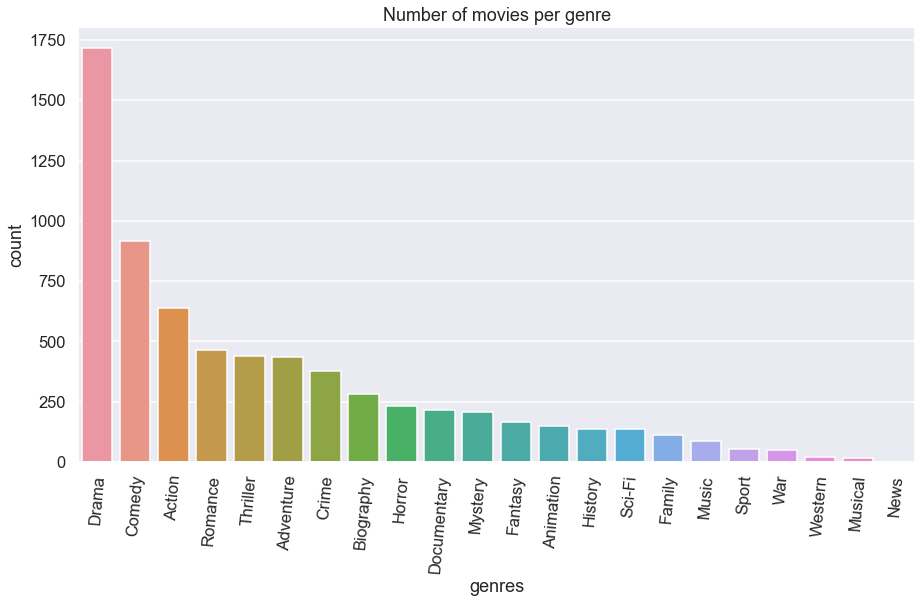

In [99]:
#countplot showing the number of movies per genre
sns.set(style='darkgrid')
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.countplot(x=movies['genres'], order=movies['genres'].value_counts().index)
ax.set_title('Number of movies per genre')
plt.xticks(rotation=85)
fig.savefig('images/number_of_movies.png');

Drama, comedy and action are the genres that have the highest number of movies released in this dataset. Drama and  comedy are probably the largest film genres because they include a broad spectrum of films. They are more general categories, hence can fall into a movie with more than one genre classification.<br>

The genres with the least number of movies are war, western, musical and news. These genres are more specific based on the plot of the movie.

### Distribution of the movies' average rating

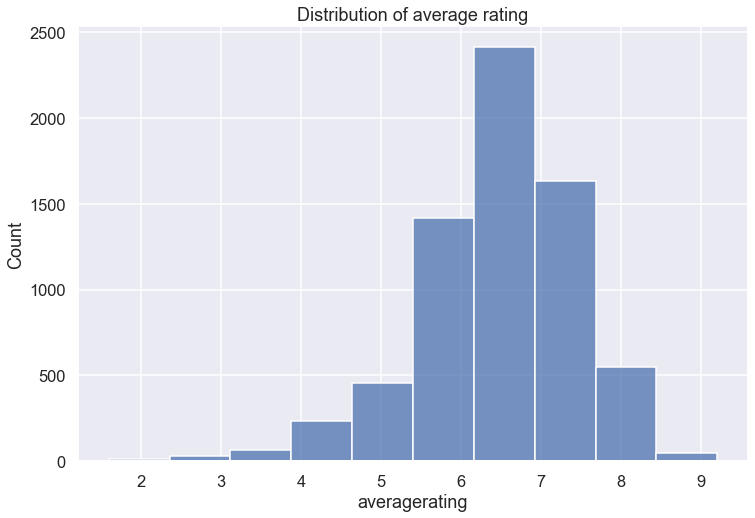

In [64]:
#histogram showing the average rating distribution
fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(movies['averagerating'], bins= 10, ax=ax)
ax.set_title('Distribution of average rating');

Most movies have an average rating of around 6. Generally, the distribution is negatively skewed. There are a few movies with a rating of less than 4.<br>
After understanding this distribution, it is important to look at the average rating by genre.

### Genre of movies with the highest average rating

In [68]:
genres_rating_df = movies.groupby('genres')['averagerating'].mean().sort_values(ascending = False)
genres_rating_df.head(7)

genres
Documentary    7.276744
Biography      6.971986
Sport          6.896154
History        6.873333
War            6.786000
Music          6.743820
Animation      6.696026
Name: averagerating, dtype: float64

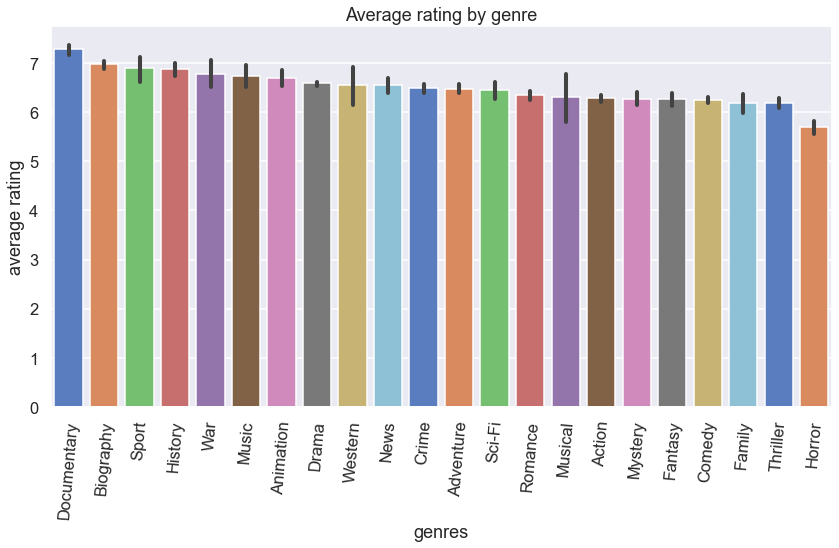

In [69]:
#bar graph showing the average rating by genre
fig, ax =plt.subplots(figsize=(14,7))
order_by = movies.groupby('genres')['averagerating'].mean().sort_values(ascending=False).index
sns.barplot(data=movies, x='genres', y= 'averagerating', palette='muted', order=order_by, ax=ax)
ax.set_title('Average rating by genre')
ax.set_ylabel('average rating')
plt.xticks(rotation=85);

The difference between the heights of the bars, which represent the average rating, is quite small.<br>
Documentary, biography and sport have the highest average rating while family, thriller and horror have the lowest average rating.

### Total gross income by genre 

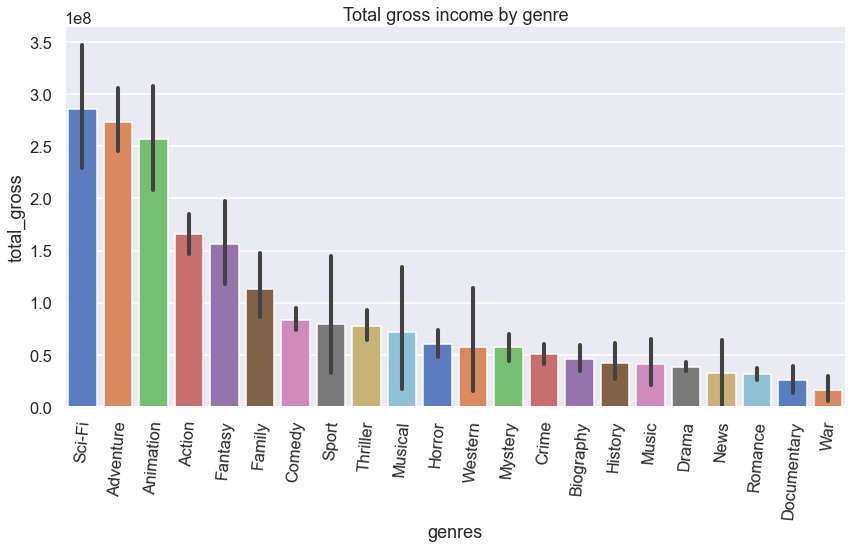

In [70]:
#bar graph showing the total gross income by genre
fig, ax =plt.subplots(figsize=(14,7))
order_by = movies.groupby('genres')['total_gross'].mean().sort_values(ascending=False).index
sns.barplot(data=movies, x='genres', y= 'total_gross', palette='muted', order=order_by, ax=ax)
ax.set_title('Total gross income by genre')
plt.xticks(rotation=85);

Box office Mojo tracks theatrical box office earnings. Additional sources of revenue, such as home entertainment sales and rentals, television rights, product placement fees are not included.<br>
The genres with the highest income are Sci-Fi, adventure, animation and action while the genres with the lowest income are romance, documentary and war.<br>

Various factors can affect the total gross income of a movie. In this case, I will investigate if there is a relationship between the average rating and the gross income.

### Relationship between the average rating and the gross income

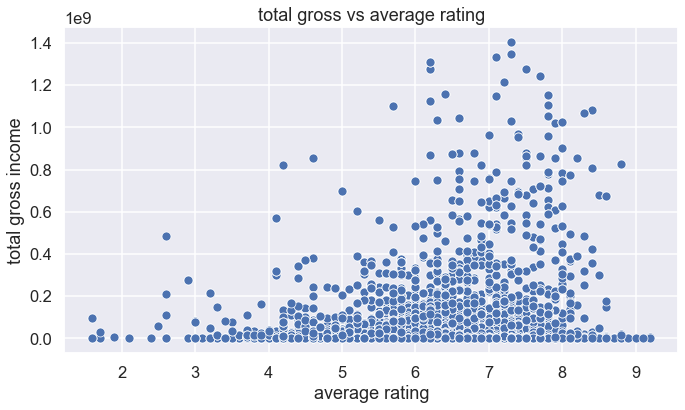

In [74]:
#scatter plot showing  total gross vs average rating
fig, ax =plt.subplots(figsize=(11,6))
sns.scatterplot(x=movies['averagerating'], y=movies['total_gross'], ax=ax)
ax.set_title('total gross vs average rating')
ax.set_ylabel('total gross income')
ax.set_xlabel('average rating');

There is no clear relationship between the total gross income and the average rating. However, movies with a low average rating of below 4 have a low total gross income.

### Gross income by start year

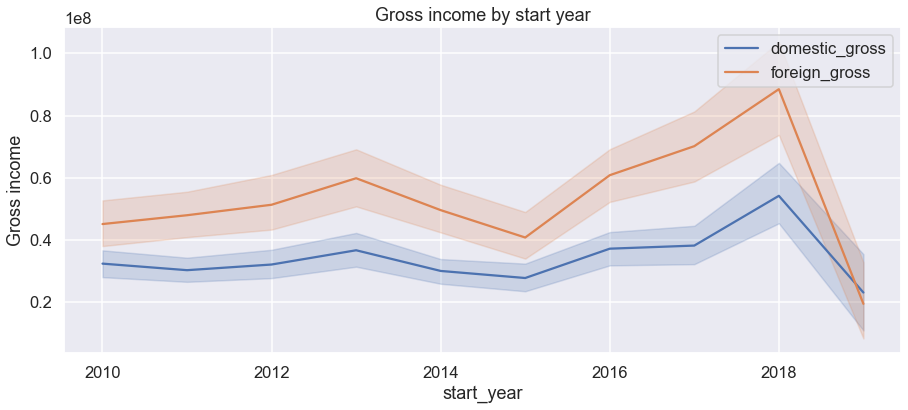

In [96]:
#lineplot showing the domestic gross and foreign gross income by start year
fig, ax =plt.subplots(figsize=(15,6))
sns.lineplot(data=movies, x='start_year', y='domestic_gross', ax=ax, label='domestic_gross')
sns.lineplot(data=movies, x='start_year', y='foreign_gross', label='foreign_gross', ax=ax)
ax.set_title('Gross income by start year')
ax.set_ylabel('Gross income');

Throughout the years, the foreign gross is often higher than the domestic gross income when a movie is released. <br>
Movies that were released in 2018 had the highest foreign gross and domestic gross income.The gross incomes then drastically dropped to their lowest for movies that were released in 2019. This is probably because most people preferred to utilize streaming services rather than go to the theatres. <br>For instance, from 2019, Netflix grew at an astonishing pace around the world.  The streaming video company added 9.6 million paid subscribers in the first three months of 2019.

## Conclusions and recommendations

- The genres of most of the movies that have been released are drama, comedy and action.<br>
- From the dataset available, the popularity and success of a given genre can be determined based on the average rating of the genre or the total gross income of the genre.<br>
- Documentary, biography and sport have the highest average rating while Sci-Fi, adventure, animation and action have the highest total gross income.Despite documentary and biography having the highest average rating, they have a very low income.There is no clear relationship between the total gross income and the average rating.
- Microsoft should consider focusing on genres with the highest total gross income in order to get higher returns on their investment. These genres are Sci-Fi, adventure, animation and action. They seem to appeal to a broad audience hence have a high theatrical box office earnings. 
- Microsoft should focus on exploring more the international markets  which have had a higher gross over the years when compared to the domestic markets. The movies created should consider the interests of the international market.
- Due to the drastic drop in the gross from theatrical earnings for movies released in 2019, Microsoft should look into other sources of revenue and invest in them.

## Future work

- Further research should be done to determine the best time of the year to release a movie of a certain genre.
- It is beneficial to determine whether the total gross income of a genre increases proportionally if the production, development, marketing, and advertising budgets of the movie are increased. This can help in predicting the profits based on the budget.
- Other than theatrical earnings, there are other sources of revenue for studios such as home entertainment sales and rentals, television rights, product placement fees and streaming services. It would be important to collect data about these sources of revenue and compare them to the revenue from the theatre earnings.
